In [93]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

In [94]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [95]:
X_train = X_train.reshape(X_train.shape[0], 28*28).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28*28).astype("float32")
X_train = X_train / 255
X_test = X_test / 255

In [96]:
nf = 0.5
size_train = X_train.shape
X_train_noise = X_train+nf*np.random.normal(loc=0.0,
                          scale=0.5,size=size_train)
X_train_noise = np.clip(X_train_noise, 0.,1.)
size_test = X_test.shape
X_test_noise = X_test+nf*np.random.normal(loc=0.0,
                          scale=0.5,size=size_test)
X_test_noise = np.clip(X_test_noise, 0., 1.)

Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_80 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_81 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_82 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_83 (Dense)             (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


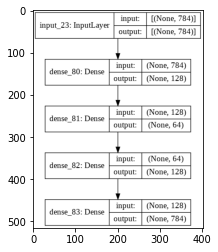

In [97]:
input_img = Input(shape=(784,))
x = Dense(128, activation="relu")(input_img)
encoded = Dense(64, activation="relu")(x)

x = Dense(128, activation="relu")(encoded)
decoded = Dense(784, activation="sigmoid")(x)

autoencoder = Model(input_img, decoded)
autoencoder.summary()  # 顯示模型摘要資訊
plot_model(autoencoder, to_file='model_plot_mlp.png', show_shapes=True, show_layer_names=True)
ax = plt.subplot(111)
ax.margins(x=0, y=0)   
ax.imshow(plt.imread("model_plot_mlp.png"))
# # 定義 encoder 模型
# encoder = Model(input_img, encoded)
# encoder.summary()    # 顯示模型摘要資訊
# # 定義 decoder 模型
# decoder_input = Input(shape=(64,))
# decoder_layer = autoencoder.layers[-2](decoder_input)
# decoder_layer = autoencoder.layers[-1](decoder_layer)
# decoder = Model(decoder_input, decoder_layer)
# decoder.summary()    # 顯示模型摘要資訊
autoencoder.compile(loss="binary_crossentropy", optimizer="adam",
                    metrics=["accuracy"])

In [98]:
autoencoder.fit(X_train_noise, X_train_noise, validation_data=(X_test_noise, X_test_noise), 
                epochs=10, batch_size=256, shuffle=True, verbose=2)
autoencoder.save("ae_mlp.h5")

Epoch 1/10
235/235 - 5s - loss: 0.4376 - accuracy: 0.0016 - val_loss: 0.3975 - val_accuracy: 0.0027
Epoch 2/10
235/235 - 4s - loss: 0.3891 - accuracy: 0.0016 - val_loss: 0.3822 - val_accuracy: 0.0016
Epoch 3/10
235/235 - 4s - loss: 0.3793 - accuracy: 0.0020 - val_loss: 0.3755 - val_accuracy: 0.0016
Epoch 4/10
235/235 - 4s - loss: 0.3746 - accuracy: 0.0023 - val_loss: 0.3721 - val_accuracy: 0.0022
Epoch 5/10
235/235 - 4s - loss: 0.3714 - accuracy: 0.0021 - val_loss: 0.3693 - val_accuracy: 0.0017
Epoch 6/10
235/235 - 4s - loss: 0.3693 - accuracy: 0.0022 - val_loss: 0.3677 - val_accuracy: 0.0014
Epoch 7/10
235/235 - 4s - loss: 0.3680 - accuracy: 0.0023 - val_loss: 0.3671 - val_accuracy: 0.0021
Epoch 8/10
235/235 - 4s - loss: 0.3671 - accuracy: 0.0024 - val_loss: 0.3660 - val_accuracy: 0.0022
Epoch 9/10
235/235 - 4s - loss: 0.3664 - accuracy: 0.0024 - val_loss: 0.3656 - val_accuracy: 0.0022
Epoch 10/10
235/235 - 4s - loss: 0.3658 - accuracy: 0.0025 - val_loss: 0.3653 - val_accuracy: 0.0024

In [99]:
encoded_imgs = encoder.predict(X_test_noise)
decoded_imgs = decoder.predict(encoded_imgs)

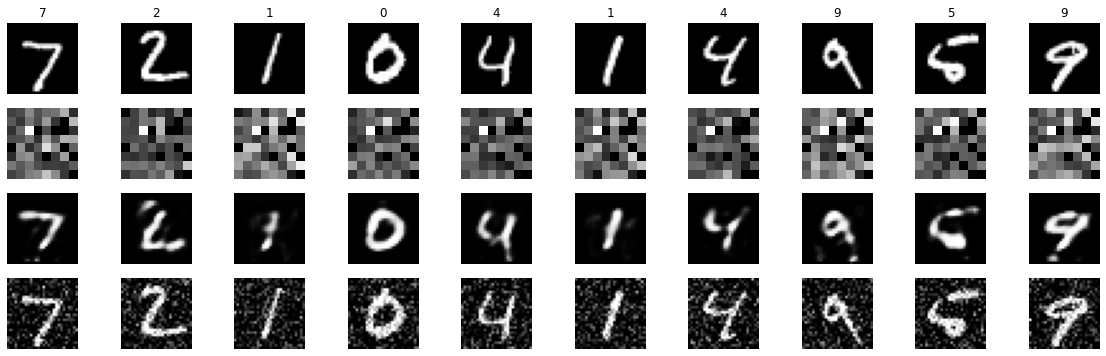

In [100]:
n = 10  # 顯示幾個數字
plt.figure(figsize=(20, 6))
for i in range(n):
    # 原始圖片
    ax = plt.subplot(4, n, i + 1)
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    ax.title.set_text(str(y_test[i]))
    # 壓縮圖片
    ax = plt.subplot(4, n, i + 1 + n)
    ax.imshow(encoded_imgs[i].reshape(8, 8), cmap="gray")
    ax.axis("off")
    # 還原圖片
    ax = plt.subplot(4, n, i + 1 + 2*n)
    ax.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.axis("off")

    ax = plt.subplot(4, n, i + 1 + 3*n)
    ax.imshow(X_test_noise[i].reshape(28,28), cmap="gray")
    ax.axis("off")
plt.show()